# Weighted ECM clustering vs Traditional ECM clustering
### With IRIS (UCI dataset)

In [20]:
## Importing
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np
from evclust.utils import plotting, display_results_fuzzy_partition, display_results_evidential
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from evclust.ecm import ecm
from evclust.wecm_new_barycenter import wecm
from evclust.fcm.fcm_keller2000 import fcm as fcm_keller2000
from evclust.fcm.fcm_wang2004 import fcm as fcm_wang2004
from evclust.fcm.fcm_frigui2004 import scad1
from evclust.fcm.fcm_frigui2004 import scad2
from evclust.fcm.ifwfcm_xing2014 import fcm as ifwfcm_xing2014
from evclust.fcm.ifwfcm_kd_xing2014 import fcm as ifwfcm_kd_xing2014

Instances 150 - Features 4 - Class 3
   sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


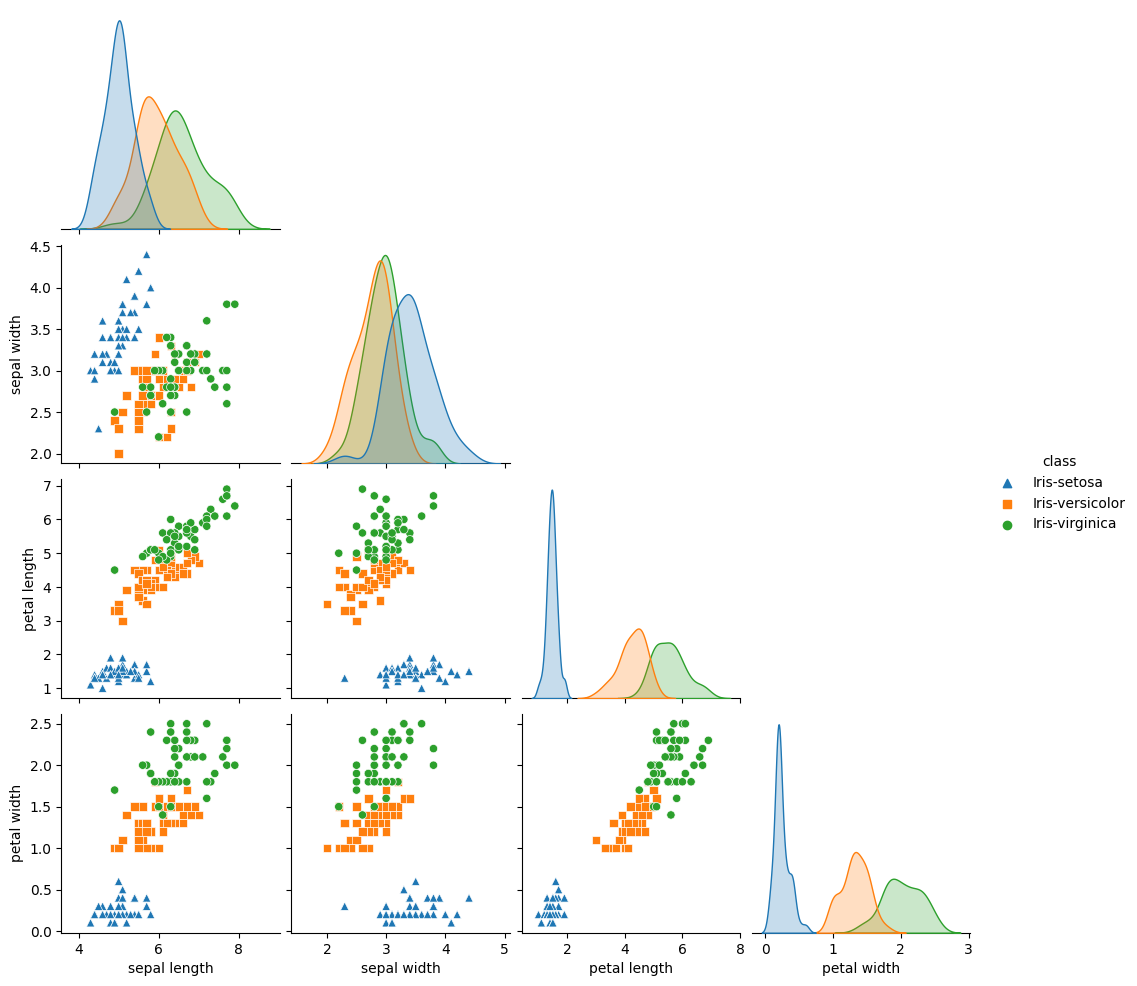

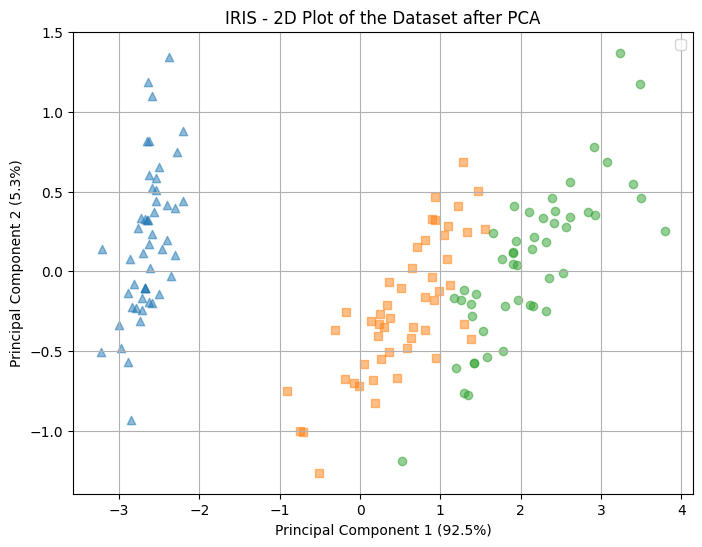

In [21]:
# fetch dataset - IRIS
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

label_column_nm = y.columns[0]
labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y[label_column_nm])

markers = ['^', 's', 'o']
plotting(X, y, ds_name="IRIS", matrix_plot=True, markers=markers)

# Normalization
scaler = MinMaxScaler((0,1))
X = pd.DataFrame(scaler.fit_transform(X))

## Traditional ECM

In [5]:
%%capture
# Traditional ECM clustering
delta = np.sqrt(20)
ecm_models = np.array([])
for i in range(10):
    model = ecm(x=X, c=3, beta=2, alpha=1, delta=delta, init="None", epsi=1e-5)
    ecm_models = np.append(ecm_models, model)

ecm_models = sorted(ecm_models, key=lambda x : x['crit'])

J values: [3.49289685982977, 3.4929055186928246, 3.4929063667330706, 3.492906394550838, 3.492907849290254, 3.492908189269125, 3.4929085385049605, 3.492908685026926, 3.492908705120802, 3.492909237189997]
ARI values: [0.6642681063461342, 0.6642681063461342, 0.6642681063461342, 0.6642681063461342, 0.6642681063461342, 0.6642681063461342, 0.6642681063461342, 0.6642681063461342, 0.6642681063461342, 0.6642681063461342]
NS values: [1.3004116365107108, 1.3364806203047639, 1.249595164458671, 1.3011801751106802, 1.2495490395266067, 1.3288129656129117, 1.328827896243385, 1.3011763280906834, 1.2495266908191407, 1.3277666939803194]
NMI values: [0.6907358850090398, 0.6907358850090398, 0.6907358850090398, 0.6907358850090398, 0.6907358850090398, 0.6907358850090398, 0.6907358850090398, 0.6907358850090398, 0.6907358850090398, 0.6907358850090398]


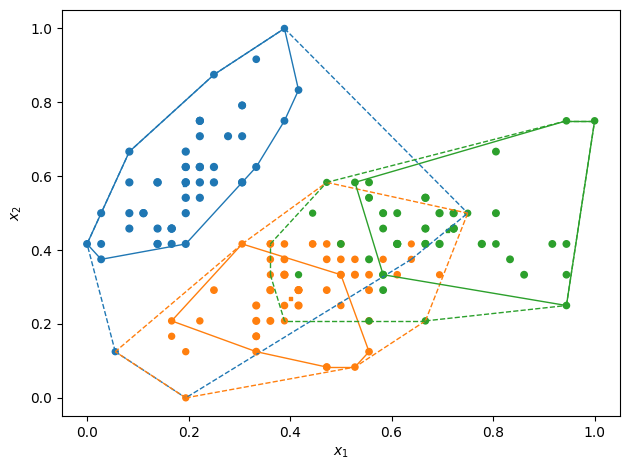

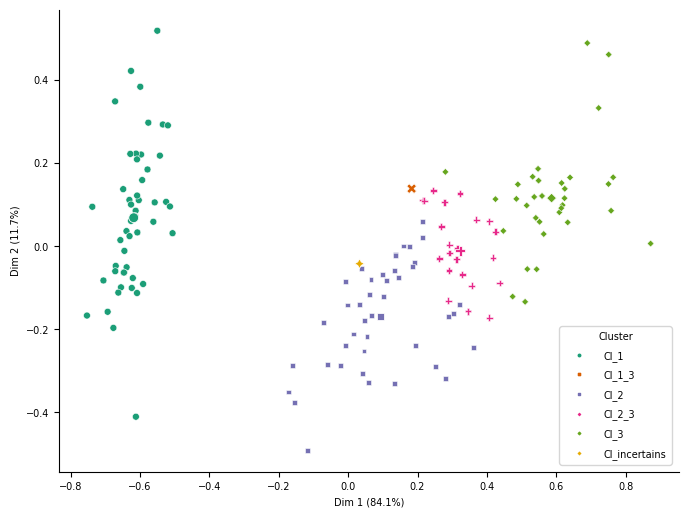

In [6]:
display_results_evidential(X, ecm_models, numeric_labels)

## Weighted ECM (WECM) with new equations of centers

In [22]:
%%capture
# Weighted ECM clustering
wecm_models = np.array([])
c = 3
d = X.shape[1]
delta = np.sqrt(20)
for i in range(10):
    model = wecm(x=X, c=c, beta=2, alpha=1, delta=delta, epsilon=1e-4)
    wecm_models = np.append(wecm_models, model)

wecm_models = sorted(wecm_models, key=lambda model: model['crit'])

J values: [0.18704565193877612, 0.18704565193877612, 0.21491911685588505, 0.21637177748360742, 0.21637177748360742, 0.21637177748360742, 0.26830690935004764, 0.26830690935004764, 0.26830690935004764, 0.26830690935004764]
ARI values: [0.9037675791580496, 0.9037675791580496, 0.8681109348039796, 0.9037675791580496, 0.9037675791580496, 0.9037675791580496, 0.818005634903832, 0.818005634903832, 0.818005634903832, 0.818005634903832]
NS values: [1.0547325014358784, 1.0547325014358784, 0.9404520517402318, 1.0437635464452069, 1.0437635464452069, 1.0437635464452069, 0.846828534949315, 0.846828534949315, 0.846828534949315, 0.846828534949315]
NMI values: [0.8850620966553382, 0.8850620966553382, 0.849780562488021, 0.8850620966553382, 0.8850620966553382, 0.8850620966553382, 0.8130427037493442, 0.8130427037493442, 0.8130427037493442, 0.8130427037493442]


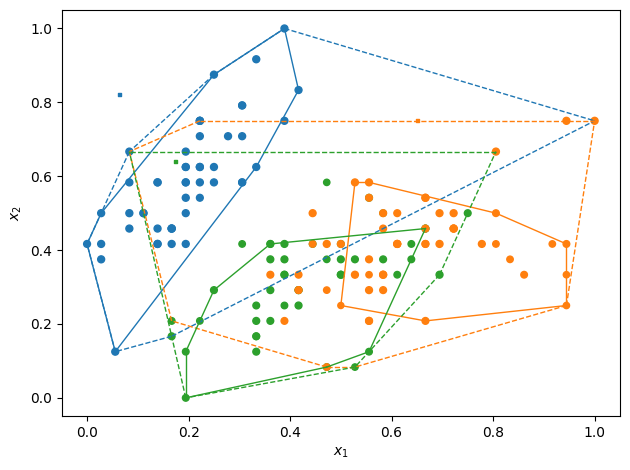

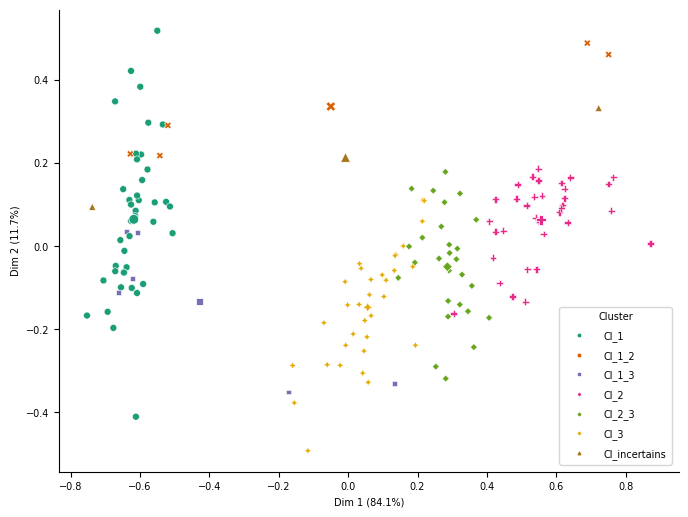

In [23]:
display_results_evidential(X, wecm_models, numeric_labels)

In [7]:
# top_weights = [model['W'] for model in wecm_models]
# for W in top_weights:
#     print(f"\n{W}")

# Weighted FCM - Keller et al. 2000

In [10]:
%%capture
keller_models = np.array([])
c = 3
w0 = np.ones((c, X.shape[1])) / X.shape[1]
for i in range(10):
    model = fcm_keller2000(X, c, epsilon=1e-5, verbose=True, init="None")
    keller_models = np.append(keller_models, model)

J values: [0.24093414592716061, 0.24093156626658777, 0.24093127136615328, 0.24092968535537182, 0.2409315599728058, 0.24092974887021237, 0.24092963716193214, 0.24093045096957472, 0.24092992936092048, 0.24093159204735246]
ARI values: [0.9037141640512019, 0.9037141640512019, 0.9037141640512019, 0.9037141640512019, 0.9037141640512019, 0.9037141640512019, 0.9037141640512019, 0.9037141640512019, 0.9037141640512019, 0.9037141640512019]
NMI values: [0.8801106732223013, 0.8801106732223013, 0.8801106732223013, 0.8801106732223013, 0.8801106732223013, 0.8801106732223013, 0.8801106732223013, 0.8801106732223013, 0.8801106732223013, 0.8801106732223013]


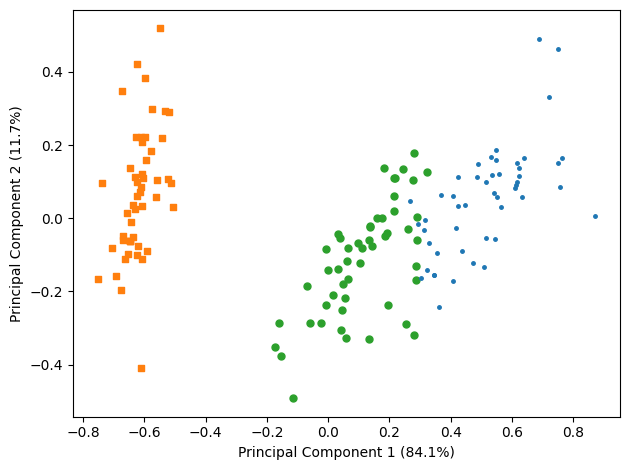

In [11]:
display_results_fuzzy_partition(X, keller_models, numeric_labels)

# Weighted FCM Wang 2004

In [ ]:
%%capture
wang_models = np.array([])
c = 3
for i in range(2):
    model = fcm_wang2004(X, c, w_beta=0.5, verbose=True, init="None")
    wang_models = np.append(wang_models, model)

J values: [1.9789825118748446e-06, 1.7589815458925846e-06]
ARI values: [0.8857921001989628, 0.8857921001989628]
NMI values: [0.870521418179061, 0.870521418179061]


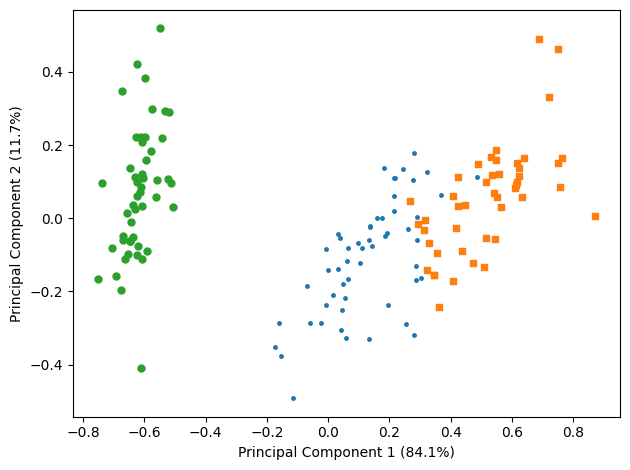

In [12]:
display_results_fuzzy_partition(X, wang_models, numeric_labels)

# SCAD1

In [12]:
%%capture
scad1_models = np.array([])
c = 3
for i in range(10):
    model = scad1(X, c, verbose=True, init="None")
    scad1_models = np.append(scad1_models, model)

J values: [3.484784271200102, 3.48453643736138, 3.484598904549131, 3.484099824779709, 3.4839970264197664, 3.4846162534572893, 3.4842012193569643, 3.483996417009442, 3.4841915990891525, 3.484337413617742]
ARI values: [0.7163421126838476, 0.7163421126838476, 0.7163421126838476, 0.7163421126838476, 0.7163421126838476, 0.7163421126838476, 0.7163421126838476, 0.7163421126838476, 0.7163421126838476, 0.7163421126838476]
NMI values: [0.7419116631817837, 0.7419116631817837, 0.7419116631817836, 0.7419116631817837, 0.7419116631817837, 0.7419116631817836, 0.7419116631817836, 0.7419116631817836, 0.7419116631817836, 0.7419116631817837]


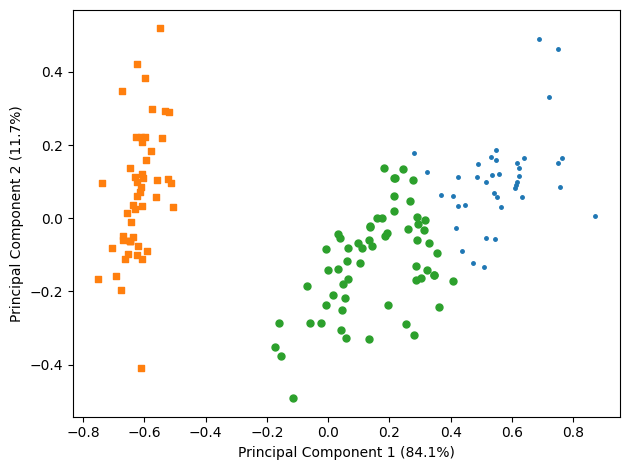

In [13]:
display_results_fuzzy_partition(X, scad1_models, numeric_labels)

# SCAD2

In [14]:
%%capture
scad2_models = np.array([])
c = 3
for i in range(10):
    model = scad2(X, c, verbose=True, init="None")
    scad2_models = np.append(scad2_models, model)

J values: [0.24851588340535857, 0.24857344257979713, 0.4431673207689347, 0.24837832560291806, 0.248354284453021, 0.24906055926802728, 0.24839369611395715, 0.24938737809683656, 0.24900902984607798, 0.24906714519386702]
ARI values: [0.8018797324369291, 0.818005634903832, 0.40352340802098124, 0.8680377279943841, 0.8340750470114582, 0.7436826319432358, 0.8507972789115646, 0.7436826319432358, 0.7720038802323269, 0.7720038802323269]
NMI values: [0.7959037461477683, 0.8130427037493441, 0.5367011783151735, 0.8464828103876364, 0.8191599501911045, 0.7660355440487252, 0.8308354550894079, 0.7660355440487252, 0.7831589314611246, 0.7831589314611245]


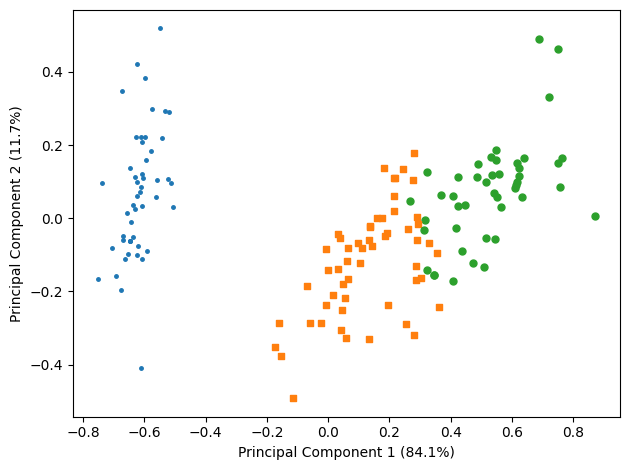

In [15]:
display_results_fuzzy_partition(X, scad2_models, numeric_labels)

# IFWFCM - Xing et al. 2014

In [16]:
%%capture
ifwfcm_models = np.array([])
c = 3
for i in range(10):
    model = ifwfcm_xing2014(X, c, verbose=True, init="None")
    ifwfcm_models = np.append(ifwfcm_models, model)

J values: [0.35416644658779134, 0.3517677381318826, 0.35310365841628133, 0.3539184472943868, 0.35255760535819086, 0.35308042252185323, 0.3521287565059149, 0.3530002965259428, 0.35409615850761733, 0.35389046445695116]
ARI values: [0.6303393343888227, 0.6529974105499732, 0.6412050161871702, 0.6303393343888227, 0.652516389967057, 0.652516389967057, 0.6529974105499732, 0.6412050161871702, 0.6303393343888227, 0.6303393343888227]
NMI values: [0.6659323679491874, 0.6838063565338026, 0.6735735454651064, 0.6659323679491874, 0.6818188711582578, 0.6818188711582578, 0.6838063565338026, 0.6735735454651064, 0.6659323679491874, 0.6659323679491874]


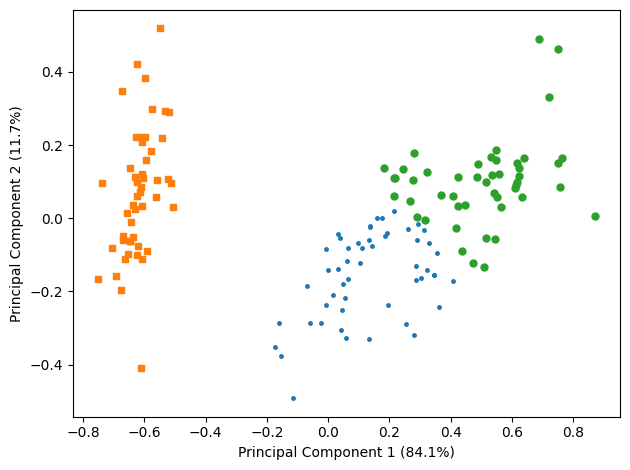

In [17]:
display_results_fuzzy_partition(X, ifwfcm_models, numeric_labels)

# IFWFCM_KD Xing 2014

In [18]:
%%capture
ifwfcm_kd_models = np.array([])
c = 3
for i in range(10):
    model = ifwfcm_kd_xing2014(X, c, verbose=True, init="None")
    ifwfcm_kd_models = np.append(ifwfcm_kd_models, model)

J values: [4.704771862019253, 4.704984288849496, 4.705112634034482, 4.704753622086329, 4.704184638397856, 4.705329147788483, 4.705179748524621, 4.696027950202815, 4.705046744151421, 4.699807808712296]
ARI values: [0.676454462051257, 0.676454462051257, 0.676454462051257, 0.676454462051257, 0.676454462051257, 0.676454462051257, 0.676454462051257, 0.6770802856430762, 0.676454462051257, 0.6648253082377061]
NMI values: [0.7004099176605741, 0.7004099176605741, 0.7004099176605741, 0.7004099176605743, 0.7004099176605741, 0.7004099176605741, 0.7004099176605741, 0.7037042596540184, 0.7004099176605741, 0.6933208584680063]


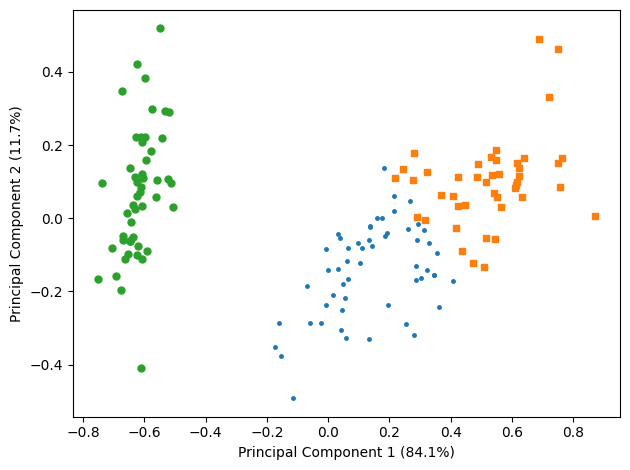

In [19]:
display_results_fuzzy_partition(X, ifwfcm_kd_models, numeric_labels)